<a href="https://colab.research.google.com/github/mpodlasin/mlsg-kaggle/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic

## Ładowanie danych

`kaggle` jest to skrypt pozwalający w prosty sposób pobierać dane z portalu Kaggle. Najpierw musimy go zanistalować:

(zwróć uwagę, że komenda zaczyna się od znaku `!`, oznacza to, jest to komenda języka `bash` a nie Python)

In [ ]:
!pip install kaggle

Aby skrypt `kaggle` działał poprawnie, musimy założyć sobie konto na https://kaggle.com i dodać się do konkursu z którego będziemy ściągać dane (w tym przypadku https://www.kaggle.com/c/titanic).

Po zrobieniu tego, z portalu kaggle musimy ściągnąć specjalny klucz (w postaci pliku JSON), który pozwala portalowi kaggle potwierdzić, że my to faktycznie my i że mamy dostęp do konkursu. W tym celu idziemy do: https://www.kaggle.com/twoj_login/account i klikamy przycisk "Create New API Token". Spowoduje to ściągnięcie pliku `kaggle.json`.

Następnie używamy następującego kodu aby zrobić uppload tego pliku do naszego notebooka:

In [ ]:
from google.colab import files

files.upload()

Skrypt `kaggle` wymaga, żeby plik `kaggle.json` znajdował się w folderze `.kaggle` w roocie, naszego drzewa katalogów.

Używamy więc komend bashowych, żeby stworzyć taki katalog i umieścić tam plik:

In [5]:
# tworzymy katalog
!mkdir -p ~/.kaggle

# przenosimy plik do katalogu
!cp -rf kaggle.json ~/.kaggle/

# nadajemy uprawnienia do odczytu pliku
!chmod 600 ~/.kaggle/kaggle.json

Teraz możemy już ściągać datasety za pomocą skryptu `kaggle`.

Sciągamy więc dataset Titanic:

In [ ]:
!kaggle competitions download -c titanic

## Eksploracja danych

### Nasz cel

Zanim puścimy jakieś algorytmy na datasecie, chcemy najpierw go poznań. Zrozumieć co oznaczają wszystkie kolumny w pliku csv i jakie właściwie jest nasze zadanie.

Opisy kolumn są dostępne na https://www.kaggle.com/c/titanic/data.

Najważniejsza dla nas jest kolumna `Survived` - określa ona, czy dany pasażer przeżył czy nie przeżył podróży Titaniciem.

Zauważcie, że dataset jest dostępny na kaggle'u w dwóch plikach:

* `train.csv` - plik treningowy
* `test.csv` - plik testowy

Do analiz i trenowania powinniśmy korzystać jedynie z `train.csv`.

W `test.csv` nie ma kolumny `Survived` - jest to bowiem plik, na podstawie którego mamy spróbować przewidzieć czy dany pasażer umrze, czy przeżyje.

Plik z przewidywanymi odpowiedziami mamy potem wrzucić z powrotem na portal kaggle, gdzie zostanie on sprawdzony i skuteczność naszych przewidywać zostanie oceniona.

Metryka oceny odpowiedzi to `accuracy`, czyli ułamek poprawnie zaklasyfikowanych podróżnych. Jeśli np. poprawnie przewidzimy los wszystkich podróżnych, dostaniemy ocenę 1. Jeśli poprawnie zaklasyfikujemy 50% z nich, dostaniemy ocenę 0.5 itd.

Na https://www.kaggle.com/c/titanic/leaderboard można zobaczyć jakie wyniki osiągneli inni (akurat w tym przypadku wyniki 1 są najpewniej przekłamane - odpowiedzi do tego datasetu są łatwo dostępne w sieci). Naszym celem jest osiągnięcie jak najlepszego wyniku bez podpatrywania właściwych odpowiedzi.

### Dataset treningowy

Importujemy bibliotekę https://pandas.pydata.org/, która pozwoli nam na łatwą manipaulację datasetem.

In [7]:
import pandas as pd

Pandas udostępnia funkcję `read_csv`, która bardzo łatwo pozwala wczytać dane z pliku .csv

In [8]:
train_titanic = pd.read_csv('/content/train.csv')

Aby zobaczyć dane, wystarczy wypisać zmienną w komórce notebooka, ponieważ komórki zawsze printują wartość ostatniej zmiennej znajdującej się w komórce.

Pozwala to na szybkie zorientowanie się jak właściwie wygląda nasz dataset i przykładowe datapointy.

In [ ]:
train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Ponieważ jednak pojedyncze przykłady nie mówią nam wiele o całym datasecie, chcemy uzyskać jakieś ogólniejsze informacje.

Możemy użyć methody `describe`, aby wypisać kolumny **ilościowe**, razem z podstawowymi danymi, takimi jak średnia wartość kolumny, mediana, min, max itp.

In [ ]:
train_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ta sama metoda pozwala też przejżeć dane jakościowe, jeśli dodamy parametr `include` z odpowiednią wartością.

Poznamy wtedy np. liczbę unikatowych wartości w danej kolumnie (`unique`), oraz wartość która powtarza się najczęściej (`top`), wraz z jej liczebnością (`freq`).

In [ ]:
train_titanic.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


Widzimy tutaj m. in, że:

* Wszystkie imiona i nazwiska (`Name`) są unikatowe, ponieważ `count == unique`.
* Mamy dwie wartości płci (`Sex`) i na 891 osób, mamy 577 mężczyzn.
* Numery biletów (`Ticket`) w większości są unikatowe. Możemy zobaczyć osoby, które miały bilet z największą ilością osób:

In [ ]:
train_titanic[train_titanic.Ticket == "CA. 2343"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Kolejną metodą, która może dać nam informacje o datasecie, jest `info`.

Wypisuje ona wszystkie kolumny wraz z nazwami (`Column`), typami danych  w kolumnie (`Dtype`) i liczbą wartości, które nie są puste (`Non-Null Count`).

In [ ]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Widzimy, że w kolumnach `Age`, `Cabin` i `Embarked` mamy puste pola. To ważna informacja, ponieważ będziemy musieli sobie jakoś poradzić z tymi brakującymi danymi.

Możemy poznać dokładną liczbę brakujących danych, używając metod `isna` i `sum`:

In [ ]:
train_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Najwięcej wartości brakuje w `Cabin`, ale nie jest jasne czy ta kolumna będzie w ogóle użytczna do przewidywania `Survived`.

W `Age` brakuje mniej wartości, ale intuicyjnie wydaje się, że tak kolumna jest bardzo ważna do określenia wyniku, więc może to być spora strata.

Brakujące wartości z `Embarked` są prawdopodobnie pomijalne, bo jest ich bardzo mało.

### Ploty i korelacje pomiędzy kolumnami

Kolejnym krokiem w analizie może być plotowanie danych i szukanie korelacji pomiędzy kolumnami.

Użyjemy do tego bibliotek https://matplotlib.org/ i https://seaborn.pydata.org/:


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline # dzięki temu ploty będą wyświetlane w notebooku, a nie nowych oknach

Najłatwiejszym krokiem jest uruchomienie metody `pairplot` z seagrin.

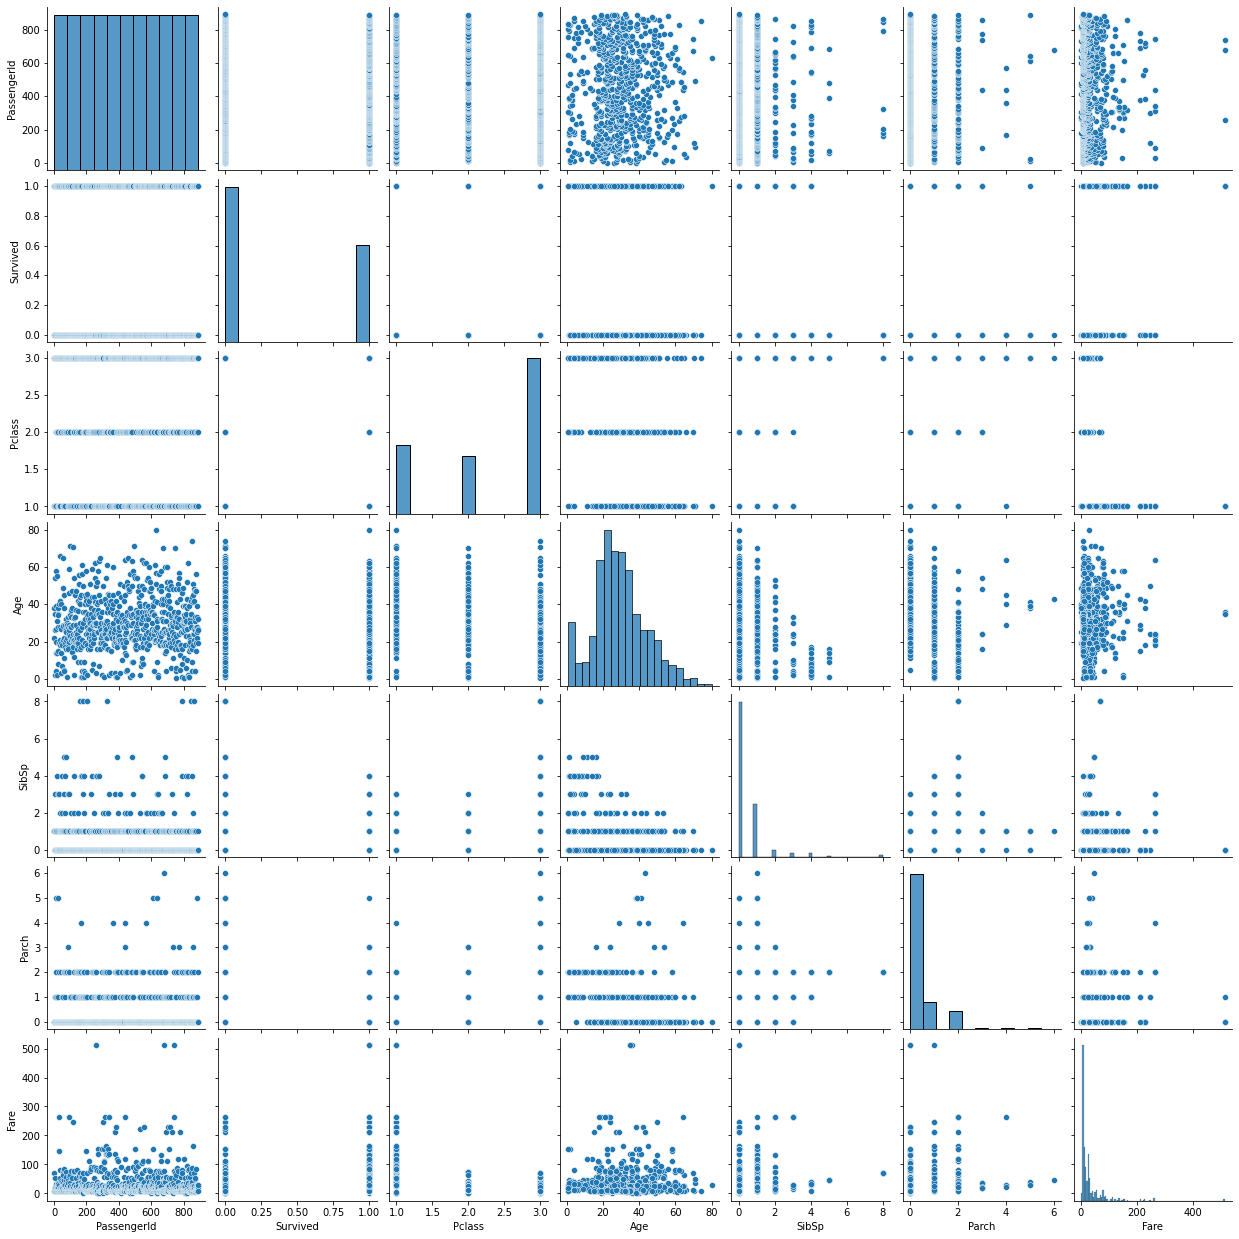

In [10]:
sns.pairplot(train_titanic)

### Dataset testowy

In [ ]:
test_titanic = pd.read_csv('/content/test.csv')

In [ ]:
test_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test_titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
test_titanic.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Lane, Mr. Patrick",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [ ]:
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test_titanic.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Inżynieria Cech

* zamienić dane jakościowe na ilościowe
* zająć się nullami
* znormalizować/zestandaryzować kolumny